In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Regression

## 1.1 Unconstrained


### 1. Multilinear Regression

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data.

In [10]:
linearRegData = np.loadtxt("DATA PA/lin_regression/regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(linearRegData)
trainSplit = linearRegData[0:800, :]
testSplit = linearRegData[800:1000, :]


In [18]:
#Adding the bias term in the equation
sensorData = trainSplit[:, 0:10]
sensorData = np.c_[sensorData, np.ones(len(sensorData)).reshape(len(sensorData),1)]
positionData = trainSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 11) and positionData shape: (800, 3)


In [19]:
normedSensorData = []
normedPositionData = []
for i in range(len(sensorData)):
    normedSensorData.append(np.linalg.norm(sensorData[i, :]))
    normedPositionData.append(np.linalg.norm(positionData[i, :]))

In [20]:
sensorData.shape

(800, 11)

#### Minimization Problem
We can see a (somewhat) linear trend between the normed sensor data and the normed position data. <br>
We have the feature matix as $\textbf{sensorData}$. We'd add a bias column to the $\textbf{sensorData}$, let's call that as $A$ and the corresponding position vector as $Y$.<br>
Let the weights of the minimzation problem be $X$<br>
We have the optimisation problem $X$ as $$argmin_{X} f(X) = \frac{1}{2}||AX-Y||^2$$ <br>
Expanding this function, we'd have $$f(x) = X^TA^TAX - X^TA^TY - Y^TAX + Y^TT$$
Taking the gradient, we've $$\nabla f(x) = A^TAX - A^TY$$
To minimise the function we need to take the $\nabla f(x) = 0$, i.e. $$A^TAX - A^TY = 0 \implies A^TAX = A^TY$$ 
We'd need to solve this equation and get the weights, $X$

In [22]:
positionData.shape

(800, 3)

In [23]:
positionData = sensorData.T @ positionData
positionData.shape

(11, 3)

In [24]:
sensorData = sensorData.T @ sensorData 
sensorData.shape

(11, 11)

In [32]:
#Using the least-squares solution to a above linear matrix equation.
weights, residuals, rank, s = np.linalg.lstsq(sensorData, positionData, rcond=None)
def MSE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    squaredErrors0 = [errorTerms0[i] **2 for i in range(len(errorTerms0))]
    squaredErrors1 = [errorTerms1[i] **2 for i in range(len(errorTerms1))]
    squaredErrors2 = [errorTerms2[i] **2 for i in range(len(errorTerms2))]

    meanSquaredError0 = round(np.mean(squaredErrors0),3)
    meanSquaredError1 = round(np.mean(squaredErrors1),3)
    meanSquaredError2 = round(np.mean(squaredErrors2),3)
    # print("Mean Square Error 0 : {}, Mean Square Error 1 : {}, Mean Square Error 2 : {}".format(meanSquaredError0, meanSquaredError1, meanSquaredError2))
    return [meanSquaredError0, meanSquaredError1, meanSquaredError2]
        

In [29]:
calculatedData = sensorData @ weights 
print(MSE(calculatedData, positionData))

[np.float64(0.0), np.float64(0.0), np.float64(0.0)]


### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [30]:
sensorDataTest = testSplit[:, 0:10]
sensorDataTest = np.c_[sensorDataTest, np.ones(len(sensorDataTest)).reshape(len(sensorDataTest),1)]

positionDataTest = testSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorData shape : (200, 11) and positionData shape: (200, 3)


In [33]:
calculatedDataTest = sensorDataTest @ weights 
print(MSE(calculatedDataTest, positionDataTest))

[np.float64(0.052), np.float64(0.084), np.float64(0.004)]


#### Graphs and metrics
We'll show the performance of the linear regression via the following metrics:
 * Pearson Correlation
 * Mean Squared Error
 * Mean Absolute Error<br>

Along with this we'll check out some correlation graphs for the predicted and the calculated outputs on the test dataset

In [34]:
def MAE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    absoluteErrors0 = [abs(errorTerms0[i]) for i in range(len(errorTerms0))]
    absoluteErrors1 = [abs(errorTerms1[i]) for i in range(len(errorTerms1))]
    absoluteErrors2 = [abs(errorTerms2[i]) for i in range(len(errorTerms2))]

    meanAbsoluteError0 = round(np.mean(absoluteErrors0),2)
    meanAbsoluteError1 = round(np.mean(absoluteErrors1),2)
    meanAbsoluteError2 = round(np.mean(absoluteErrors2),2)
    # print("Mean Absolute Error 0 : {}, Mean Absolute Error 1 : {}, Mean Absolute Error 2 : {}".format(meanAbsoluteError0, meanAbsoluteError1, meanAbsoluteError2))
    return [meanAbsoluteError0, meanAbsoluteError1, meanAbsoluteError2]
        

In [35]:
def pearsonCorrelation(X, Y):
    if len(X) != len(Y):
        raise ValueError("Vectors calculatedData and positionData must be of the same length")
    pearsonCorrelation = []
    for i in range(3) :
        calculatedData = X[:,i]
        positionData = Y[:,i]
        mean_calculatedData = np.mean(calculatedData)
        mean_positionData = np.mean(positionData)
        
        numerator = np.sum((calculatedData - mean_calculatedData) * (positionData - mean_positionData))
        denominator = np.sqrt(np.sum((calculatedData - mean_calculatedData)**2)) * np.sqrt(np.sum((positionData - mean_positionData)**2))
        if denominator == 0:
            return 0
        pearsonCorrelation.extend([(numerator / denominator)])
    return np.array(pearsonCorrelation)

In [36]:
# Calculate Pearson correlation coefficient
def measureMetrics(x, y):
    pearsonCorr = pearsonCorrelation(x, y)
    mse = np.round(MSE(x, y),2)
    mae = np.round(MAE(x, y),2)
    print(" Pearsons correlatoin coefficient 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(round(pearsonCorr[0]),
                                                                                                                            round(pearsonCorr[1]),
                                                                                                                            round(pearsonCorr[2])))
    print(" Mean Square Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mse[0], mse[1], mse[2]))
    print(" Mean absolute Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mae[0], mae[1],mae[2]))


##### Graphs

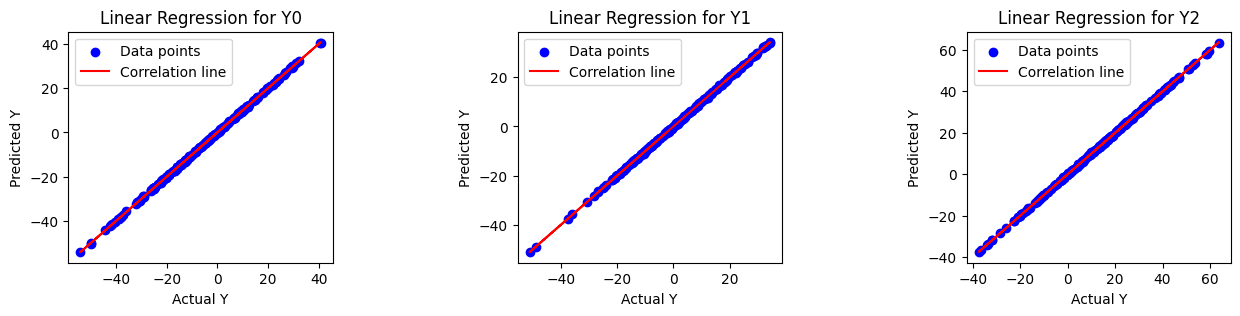

In [37]:
  # Plotting
# TODO: Make this a function 
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    y = calculatedDataTest[:,i]
    x = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Linear Regression for Y{}".format(i))
    axs[i].set_xlabel("Actual Y")
    axs[i].set_ylabel("Predicted Y")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    
plt.subplots_adjust(wspace=0.7)
plt.show()

##### Measure Metrics

In [38]:
measureMetrics(calculatedDataTest, positionDataTest)

 Pearsons correlatoin coefficient i1st co-ordinate is 1, 2nd co-ordinate is 1, 3rd co-ordinate is 1 

 Mean Square Error of 1st co-ordinate is 0.05, 2nd co-ordinate is 0.08, 3rd co-ordinate is 0.0 

 Mean absolute Error of 1st co-ordinate is 0.18, 2nd co-ordinate is 0.2, 3rd co-ordinate is 0.06 



#### Results and Conclusion
We can see that the model performs comparably on the test and the train datasets <br> Thus we conclude that the relationship between the SensorData and the Particle position data are linear and given by  $$\textbf{positionData} = \textbf{SensorData}.\textbf{Weights}$$
where $\textbf{Weights}$ is a matrix of dimentions $(10, 3)$ which are the coefficients that minimises the MSE

We can also see the $\textbf{Pearson Coefficient}$,$\textbf{ Mean Square Error}$,$\textbf{Mean absolute Error}$ of each of the component of the position of the particle

### 2. Generalised Regression with polynomial kernel


#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data and then fitting the regression model

In [58]:
polyLinearRegData = np.loadtxt("DATA PA/poly_regression/poly_regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(polyLinearRegData)
trainSplit = polyLinearRegData[0:800, :]
testSplit = polyLinearRegData[800:1000, :]

In [59]:
sensorData = trainSplit[:, 0:2]
positionData = trainSplit[:, 2:5]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 2) and positionData shape: (800, 3)


In [60]:
#Code to generate the polynomial terms of nth degree
def feature_degree(feature, degree):
    feature_powered = [pow(i, degree) for i in feature]
    return feature_powered

def feature_product(feature1, degree1, feature2, degree2) :
    feature_powered1 = feature_degree(feature1, degree1)
    feature_powered2 = feature_degree(feature2, degree2)
    if len(feature_powered1) == len(feature_powered2): 
        productFeatureVector = [feature_powered1[i] * feature_powered2[i] for i in range(len(feature_powered1))]
        return productFeatureVector
    else:
        raise ValueError("Feature vectors must be of the same length.")
    
def degreePolynomial(feature1, feature2, degree):
    list = []
    for i in range(degree+1):
        list.append(feature_product(feature1, i, feature2, degree-i))
    return list

def completeDegreePolynomial(feature1, feature2, degree):
    list = []
    for i in range(degree+1):
        degreeList = degreePolynomial(feature1, feature2, i)
        for i in range(len(degreeList)):
            list.append(degreeList[i])
        
    return np.array(list).T


##### Preparing the model for polynomial kernels 
We'd like to train the model on a bot more complicated model than just simple linear regression. For this we'll use the polynomial kernel, i.e. for a 2 feature vector, $X_1$ and $X_2$ and a degree k, we'll get all polynomial terms of $X_1$ and $X_2$ of degree 2 as well as the polynomial terms less than 2 such as : $X_1^2$ , $X_2^2$ , $X_1X_2$, $X_1$ ,$X_2$ and $1$  
So, for the output vector $Y$, we'd have the equation as : $$ a_1*X_1^2 + a_2*X_2^2 + a_3*X_1X_2 + a_4*X_1 + a_5*X_2 + a_6* I = Y  $$
So, we need to find the coefficients, $a_1, a_2, a_3, a_4, a_5, a_6$<br>
Let's have the Matrix $A$ having the columns as these column-vectors : $X_1^2$ , $X_2^2$ , $X_1X_2$, $X_1$ ,$X_2$ and $1$ <br> let the vector $Y$ be the vector the coefficients: $a_1, a_2, a_3, a_4, a_5, a_6$ <br>
So, this problem becomes a minimisation problem of $$argmin_{X} f(X) = \frac{1}{2}||AX-Y||^2$$ <br>  
<br>
Like above, To minimise the function we need to take the $\nabla f(x) = 0$, i.e. $$A^TAX - A^TY = 0 \implies A^TAX = A^TY$$ <br>
Given the polynomial kernels(polynomial terms), we'll like to perform regression on the polynomial terms.<br> We'll first generate the polynomial kernels for degree: 1, 2, 3, 4

In [61]:
feature1 = sensorData[:,0]
feature2 = sensorData[:,1]

#Generating the feature kernel for degree 1 and its weights
polynomialKernel1 = completeDegreePolynomial(feature1, feature2, 1)

#Generating the feature kernel for degree 2 and its weights
polynomialKernel2 = completeDegreePolynomial(feature1, feature2, 2)

#Generating the feature kernel for degree 3 and its weights
polynomialKernel3 = completeDegreePolynomial(feature1, feature2, 3)

#Generating the feature kernel for degree 4 and its weights
polynomialKernel4 = completeDegreePolynomial(feature1, feature2, 4)


In [62]:
positionDataTest.shape

(200, 3)

In [63]:
postitionData1 = polynomialKernel1.T @ positionData
postitionData2 = polynomialKernel2.T @ positionData
postitionData3 = polynomialKernel3.T @ positionData
postitionData4 = polynomialKernel4.T @ positionData

In [65]:
polynomialKernel1 = polynomialKernel1.T @ polynomialKernel1
polynomialKernel2 = polynomialKernel2.T @ polynomialKernel2
polynomialKernel3 = polynomialKernel3.T @ polynomialKernel3
polynomialKernel4 = polynomialKernel4.T @ polynomialKernel4

polynomialKernel1.shape

(3, 3)

In [70]:
#Calculating the weights on the polynomial kernel
weights1, residuals, rank, s = np.linalg.lstsq(polynomialKernel1, postitionData1, rcond=None)
weights2, residuals, rank, s = np.linalg.lstsq(polynomialKernel2, postitionData2, rcond=None)
weights3, residuals, rank, s = np.linalg.lstsq(polynomialKernel3, postitionData3, rcond=None)
weights4, residuals, rank, s = np.linalg.lstsq(polynomialKernel4, postitionData4, rcond=None)


##### Checking the MSE on the trained dataset

In [78]:
calculatedData1 = polynomialKernel1 @ weights1 
print("The MSE for the Polynomial kernel of degree 1 is {}".format(MSE(calculatedData1, postitionData1)))

calculatedData2 = polynomialKernel2 @ weights2 
print("The MSE for the Polynomial kernel of degree 2 is {}".format(MSE(calculatedData2, postitionData1)))

calculatedData3 = polynomialKernel3 @ weights3 
print("The MSE for the Polynomial kernel of degree 3 is {}".format(MSE(calculatedData3, postitionData1)))

calculatedData4 = polynomialKernel4 @ weights4 
print("The MSE for the Polynomial kernel of degree 4 is {}".format(MSE(calculatedData4, postitionData1)))

The MSE for the Polynomial kernel of degree 1 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 2 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 3 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 4 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [79]:
sensorDataTest = testSplit[:, 0:2]
positionDataTest = testSplit[:, 2:5]
print("SensorDataTest shape : {} and positionDataTest shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorDataTest shape : (200, 2) and positionDataTest shape: (200, 3)


In [80]:
feature1Test = sensorDataTest[:,0]
feature2Test = sensorDataTest[:,1]

#Generating the feature kernel for degree 1 and its weights
polynomialKernel1test = completeDegreePolynomial(feature1Test, feature2Test, 1)

#Generating the feature kernel for degree 2 and its weights
polynomialKernel2test = completeDegreePolynomial(feature1Test, feature2Test, 2)

#Generating the feature kernel for degree 3 and its weights
polynomialKernel3test = completeDegreePolynomial(feature1Test, feature2Test, 3)

#Generating the feature kernel for degree 4 and its weights
polynomialKernel4test = completeDegreePolynomial(feature1Test, feature2Test, 4)


#### Graphs and metrics
We'll show the performance of the linear regression via the following metrics:
 * Pearson Correlation
 * Mean Squared Error
 * Mean Absolute Error<br>

Along with this we'll check out some correlation graphs for the predicted and the calculated outputs on the test dataset

##### Checking the Metrics on Test Data

In [182]:
calculatedData1 = polynomialKernel1test @ weights1 
print("Metrics for Polynomial kernel of degree 1")
measureMetrics(calculatedData1, positionDataTest)

calculatedData2 = polynomialKernel2test @ weights2 
print("\nMetrics for Polynomial kernel of degree 2")
measureMetrics(calculatedData2, positionDataTest)

calculatedData3 = polynomialKernel3test @ weights3 
print("\nMetrics for Polynomial kernel of degree 3")
measureMetrics(calculatedData3, positionDataTest)

calculatedData4 = polynomialKernel4test @ weights4 
print("\nMetrics for Polynomial kernel of degree 4")
measureMetrics(calculatedData4, positionDataTest)

Metrics for Polynomial kernel of degree 1
 Pearsons correlatoin coefficient i1st co-ordinate is 0, 2nd co-ordinate is 0, 3rd co-ordinate is 0 

 Mean Square Error of 1st co-ordinate is 784.04, 2nd co-ordinate is 718.19, 3rd co-ordinate is 881.24 

 Mean absolute Error of 1st co-ordinate is 25.95, 2nd co-ordinate is 17.73, 3rd co-ordinate is 23.33 


Metrics for Polynomial kernel of degree 2
 Pearsons correlatoin coefficient i1st co-ordinate is 0, 2nd co-ordinate is 0, 3rd co-ordinate is 0 

 Mean Square Error of 1st co-ordinate is 751.88, 2nd co-ordinate is 728.22, 3rd co-ordinate is 911.64 

 Mean absolute Error of 1st co-ordinate is 25.29, 2nd co-ordinate is 16.97, 3rd co-ordinate is 23.11 


Metrics for Polynomial kernel of degree 3
 Pearsons correlatoin coefficient i1st co-ordinate is 0, 2nd co-ordinate is 0, 3rd co-ordinate is 0 

 Mean Square Error of 1st co-ordinate is 751.46, 2nd co-ordinate is 712.62, 3rd co-ordinate is 919.31 

 Mean absolute Error of 1st co-ordinate is 25.4,

In [82]:
# print("The MAE for the Polynomial kernel of degree 1 is {}".format(MAE(calculatedData1, positionDataTest)))

# print("The MAE for the Polynomial kernel of degree 2 is {}".format(MAE(calculatedData2, positionDataTest)))

# print("The MAE for the Polynomial kernel of degree 3 is {}".format(MAE(calculatedData3, positionDataTest)))

# print("The MAE for the Polynomial kernel of degree 4 is {}".format(MAE(calculatedData4, positionDataTest)))

The MAE for the Polynomial kernel of degree 1 is [np.float64(0.62), np.float64(0.69), np.float64(1.79)]
The MAE for the Polynomial kernel of degree 2 is [np.float64(0.44), np.float64(0.62), np.float64(0.62)]
The MAE for the Polynomial kernel of degree 3 is [np.float64(0.18), np.float64(0.18), np.float64(0.41)]
The MAE for the Polynomial kernel of degree 4 is [np.float64(0.09), np.float64(0.08), np.float64(0.09)]


In [83]:
# print("The MAE for the Polynomial kernel of degree 1 is {}".format(MAE(calculatedData1, positionDataTest)))

# print("The Pearson Correlation for the Polynomial kernel of degree 2 is {}".format(pearsonCorrelation(calculatedData2, positionDataTest)))

# print("The Pearson Correlation for the Polynomial kernel of degree 3 is {}".format(pearsonCorrelation(calculatedData3, positionDataTest)))

# print("The Pearson Correlation for the Polynomial kernel of degree 4 is {}".format(pearsonCorrelation(calculatedData4, positionDataTest)))

The Pearson Correlation for the Polynomial kernel of degree 1 is [0.8838906  0.35669586 0.8018185 ]
The Pearson Correlation for the Polynomial kernel of degree 2 is [0.9805971  0.94226647 0.87821526]
The Pearson Correlation for the Polynomial kernel of degree 3 is [0.9907569  0.98858801 0.97833052]
The Pearson Correlation for the Polynomial kernel of degree 4 is [0.99878333 0.99746688 0.99574669]


##### Checking for the graphs

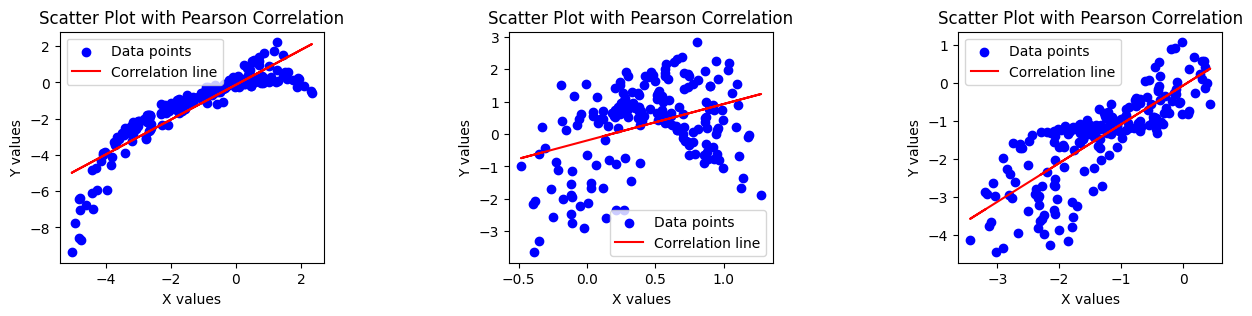

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
#Figure for degree 1
for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Scatter Plot with Pearson Correlation")
    axs[i].set_xlabel("X values")
    axs[i].set_ylabel("Y values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    

    
plt.subplots_adjust(wspace=0.7)
plt.show()

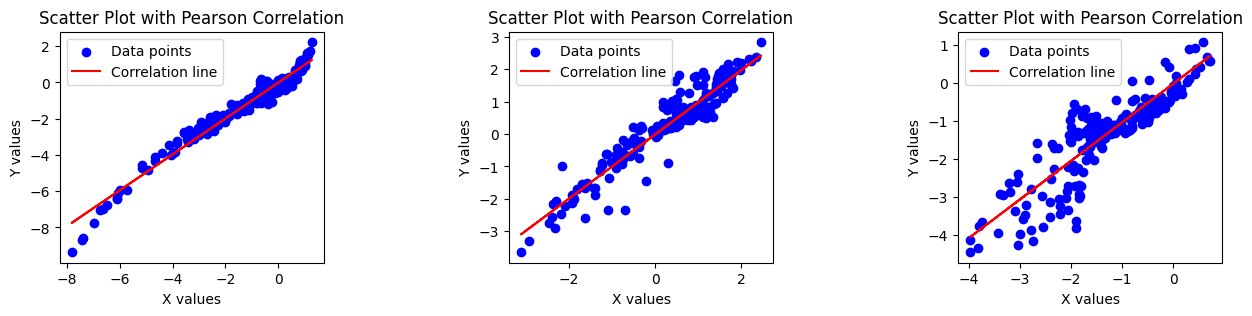

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
#Figure for degree 2
for i in range(3): 
    x = calculatedData2[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Scatter Plot with Pearson Correlation")
    axs[i].set_xlabel("X values")
    axs[i].set_ylabel("Y values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()

plt.subplots_adjust(wspace=0.7)
plt.show()

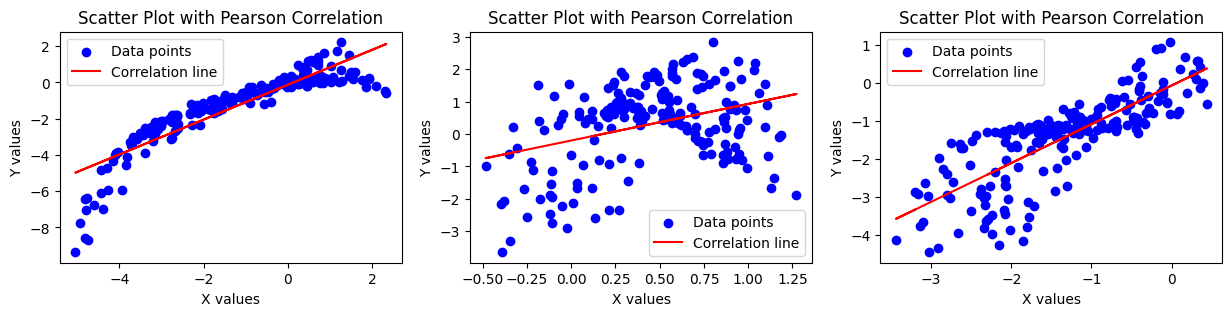

In [86]:
#Figure for degree 3
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Scatter Plot with Pearson Correlation")
    axs[i].set_xlabel("X values")
    axs[i].set_ylabel("Y values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()



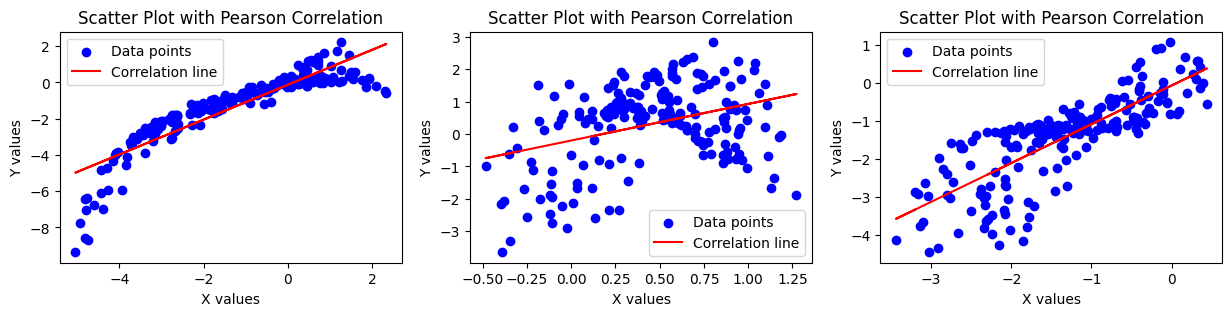

In [87]:
#Figure for degree 4
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Scatter Plot with Pearson Correlation")
    axs[i].set_xlabel("X values")
    axs[i].set_ylabel("Y values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")

    axs[i].legend()

In [ ]:
#TODO: Create Conclusion for this

## 1.2 (Linear) Constrained
So, we're given the optimisation problem from the $\textbf{Multilinear Regression}$ problem, so we've to solve the following the equation :$$\nabla f(x) = 0 \implies A^TAX - A^TY = 0 \implies A^TAX = A^TY$$ 
Where: 
* 

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 80:20 split of the data.<br> We'll import the constraints and make some adjustments

In [164]:
constraintsMatrix = np.loadtxt("DATA PA/constraints/constraints_021.txt", delimiter=",", skiprows=1, max_rows=3)
constraintsResult = np.loadtxt("DATA PA/constraints/constraints_021.txt", delimiter=",", skiprows=4)

In [165]:
constraintsMatrix.shape, constraintsResult.shape

((3, 10), (3,))

In [159]:
#Adding Bias term to the matrix
constraintsMatrix = np.hstack((constraintsMatrix, np.zeros(len(constraintsMatrix)).reshape(len(constraintsMatrix),1)))
constraintsMatrix.shape

(3, 11)

Now, we'll import the data and add the bias terms

In [120]:
linearRegData = np.loadtxt("DATA PA/lin_regression/regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(linearRegData)
trainSplit = linearRegData[0:800, :]
testSplit = linearRegData[800:1000, :]


In [121]:
#Adding the bias term in the equation
sensorData = trainSplit[:, 0:10]
positionData = trainSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 10) and positionData shape: (800, 3)


In [122]:
sensorData = np.hstack((sensorData, np.ones(len(sensorData)).reshape(len(sensorData),1)))
sensorData.shape

(800, 11)

We'll need to form a new matrix from the existing data.<br>
We'll first construct the upper part of the Matrix

In [117]:
zeros = np.zeros(len(constraintsMatrix)**2).reshape(len(constraintsMatrix), len(constraintsMatrix))
zeros.shape

(3, 3)

In [119]:
upperMatrix = np.hstack((constraintsMatrix, zeros))
upperMatrix.shape

(3, 14)

Moving onto the lower Matrix

In [125]:
lowerFirsthalf = sensorData.T @ sensorData
lowerFirsthalf.shape

(11, 11)

In [ ]:
sensorData

In [130]:
lowerSecondHalf = -constraintsMatrix.T
lowerSecondHalf.shape

(11, 3)

In [131]:
lowerMatrix = np.hstack((lowerFirsthalf, lowerSecondHalf))
lowerMatrix.shape

(11, 14)

In [133]:
upperMatrix.shape

(3, 14)

In [135]:
fullmatrix = np.vstack((upperMatrix, lowerMatrix))
fullmatrix.shape

(14, 14)

Constructing the Output Vector now

In [168]:
constraintsResult = np.expand_dims(constraintsResult, axis=1)
constraintsResult.shape

(3, 1)

In [169]:
upperVector = constraintsResult
upperVector = np.hstack((upperVector,constraintsResult))
upperVector = np.hstack((upperVector,constraintsResult))
lowerVector = sensorData.T @ positionData

In [170]:
upperVector.shape

(3, 3)

In [171]:
lowerVector.shape

(11, 3)

In [172]:
OutputVector = np.vstack((upperVector, lowerVector))
OutputVector.shape

(14, 3)

In [173]:
weights = np.linalg.inv(fullmatrix) @ OutputVector

In [178]:
weights.shape
actualWeights = weights[0:11]
actualWeights.shape

(11, 3)

##### Testing on the data

In [177]:
sensorDataTest = testSplit[:, 0:10]
sensorDataTest = np.c_[sensorDataTest, np.ones(len(sensorDataTest)).reshape(len(sensorDataTest),1)]

positionDataTest = testSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorData shape : (200, 11) and positionData shape: (200, 3)


In [184]:
predictedDataTest = sensorDataTest @ actualWeights
measureMetrics(predictedDataTest, positionDataTest)

 Pearsons correlatoin coefficient i1st co-ordinate is 1, 2nd co-ordinate is 0, 3rd co-ordinate is 1 

 Mean Square Error of 1st co-ordinate is 300.23, 2nd co-ordinate is 109.69, 3rd co-ordinate is 189.36 

 Mean absolute Error of 1st co-ordinate is 13.94, 2nd co-ordinate is 9.13, 3rd co-ordinate is 10.39 



##### Graphs

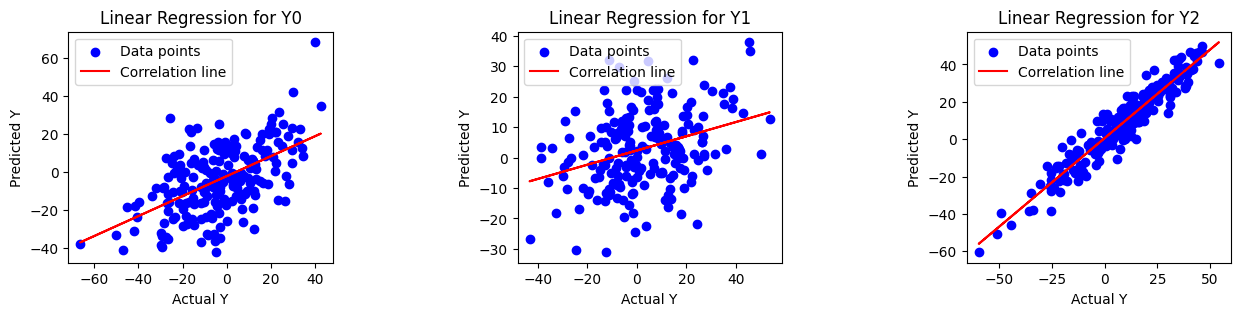

In [186]:
  # Plotting
# TODO: Make this a function 
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    y = predictedDataTest[:,i]
    x = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Linear Regression for Y{}".format(i))
    axs[i].set_xlabel("Actual Y")
    axs[i].set_ylabel("Predicted Y")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    
plt.subplots_adjust(wspace=0.7)
plt.show()

# 2. Principle Component Analysis

## 2.1 PCA Implementation
### Importing the data

In [296]:
import numpy as np

def read_idx3_ubyte_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number (first 4 bytes)
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of images (next 4 bytes)
        num_images = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of rows (next 4 bytes)
        num_rows = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of columns (next 4 bytes)
        num_cols = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the image data and reshape it to (num_images, num_rows, num_cols)
        image_data = np.frombuffer(f.read(), dtype=np.uint8).reshape((num_images, num_rows * num_cols))   
    return image_data

def read_idx1_ubyte_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number (first 4 bytes)
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of labels (next 4 bytes)
        num_labels = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the label data as a 1D array of unsigned bytes
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        
    return labels


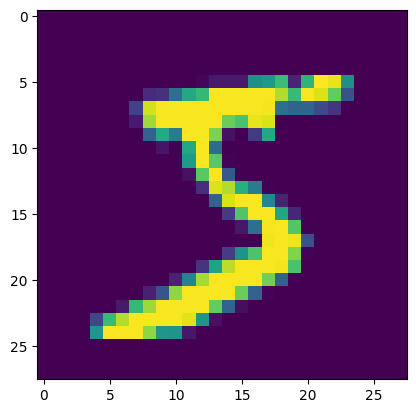

In [306]:
trainImages = read_idx3_ubyte_images("PCA Data/MNIST_ORG/train-images.idx3-ubyte")
trainLabels = read_idx1_ubyte_labels("PCA Data/MNIST_ORG/train-labels.idx1-ubyte")

testImages = read_idx3_ubyte_images("PCA Data/MNIST_ORG/t10k-images.idx3-ubyte")
testLabels = read_idx1_ubyte_labels("PCA Data/MNIST_ORG/t10k-labels.idx1-ubyte")

plt.imshow(trainImages[0].reshape(28, 28))

In [298]:
trainImages.shape

(60000, 784)

#### a. Standardize Data
We'll like to center the data by substracting the mean

In [303]:
def standardize_data(images) :
    mean = np.mean(images, axis = 0)
    standardizedImage = images - mean
    return standardizedImage

In [307]:
trainImagesNormalized = standardize_data(images)
trainImagesNormalized.shape

(60000, 28, 28)

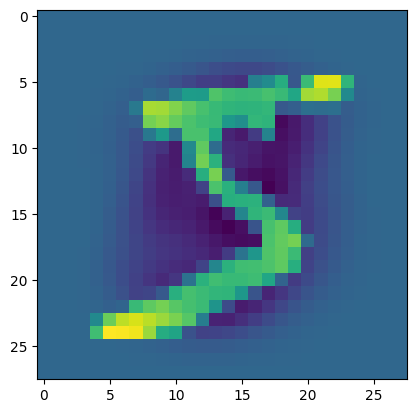

In [308]:
plt.imshow(trainImagesNormalized[0].reshape(28, 28))

##### Compute the PCA Eigen Values

In [ ]:
def compute_pca_eigen(X, n_components): 
    